# Obtaining and getting to know our data

In [1]:
#importing the libs that we'll be needing.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime


#thanks paras009 for uploading this data set! (:
#it's the data set of an ecommerce of all-occasion gifts.
#pd.read_csv will allow us to access the csv file; needed to add "encoding = 'unicode_escape' " to fully read the csv.
#.head() will allow us to get to know the first 5 rows of our dataframe (df).


df = pd.read_csv('https://raw.githubusercontent.com/paras009/Sales-and-Marketing-Analytics/master/datasets/OnlineRetail.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
#.info() allows us to check quickly for any null values in our df, as well as for the types of our values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [81]:
#checking the count of our missing values
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
YearMonth      0
DayOfWeek      0
Hour           0
Revenue        0
dtype: int64

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
#how many countries do we have in our df?
unique_countries = df['Country'].unique()
len(unique_countries)

38

## biggest insights so far:
1.Our InvoiceData is not on a date format;

2.There's a lot of missing values in our 'CustomerId', and a few in 'Description'

3.There are negative values in 'Quantity' and in 'UnitPrice';

4.The max values in 'Quantity' and in 'UnitPrice' seem like "outliers" - we should check that;

5.There isn't a revenue column, which could be very useful.

# Simple data cleaning and transformation

In [6]:
#transforming our invoicedate to a date format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#adding a year, a month, a day of week, hour and yearmonth column

df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['YearMonth'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
df['DayOfWeek'] = pd.DatetimeIndex(df['InvoiceDate']).dayofweek #monday is 0, tuesday is 1...
df['Hour'] = pd.DatetimeIndex(df['InvoiceDate']).hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,YearMonth,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010-12,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12,2,8


In [8]:
#creating a 'Revenue' column
df['Revenue'] = df['UnitPrice'] * df['Quantity']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Year         541909 non-null  int64         
 9   Month        541909 non-null  int64         
 10  YearMonth    541909 non-null  period[M]     
 11  DayOfWeek    541909 non-null  int64         
 12  Hour         541909 non-null  int64         
 13  Revenue      541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4), period[M](1)
memory usage: 57

In [9]:
#dropping the rows with empty values
df = df.dropna()
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,DayOfWeek,Hour,Revenue
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,2010.934002,7.605947,2.606402,12.737472,20.401854
std,248.693370,69.315162,1713.600303,0.248279,3.418942,1.921907,2.284952,427.591718
min,-80995.000000,0.000000,12346.000000,2010.000000,1.000000,0.000000,6.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,2011.000000,5.000000,1.000000,11.000000,4.200000
50%,5.000000,1.950000,15152.000000,2011.000000,8.000000,2.000000,13.000000,11.100000
75%,12.000000,3.750000,16791.000000,2011.000000,11.000000,4.000000,14.000000,19.500000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,6.000000,20.000000,168469.600000


In [10]:
#filtering out the rows with negative quantity values
df = df[df['Quantity'] >= 0]
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,DayOfWeek,Hour,Revenue
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,2010.934259,7.612537,2.614555,12.728247,22.394749
std,180.420210,22.096788,1713.169877,0.247829,3.416527,1.928274,2.273535,309.055588
min,1.000000,0.000000,12346.000000,2010.000000,1.000000,0.000000,6.000000,0.000000
25%,2.000000,1.250000,13969.000000,2011.000000,5.000000,1.000000,11.000000,4.680000
50%,6.000000,1.950000,15159.000000,2011.000000,8.000000,2.000000,13.000000,11.800000
75%,12.000000,3.750000,16795.000000,2011.000000,11.000000,4.000000,14.000000,19.800000
max,80995.000000,8142.750000,18287.000000,2011.000000,12.000000,6.000000,20.000000,168469.600000


In [46]:
#before we do anything else, let's apply the 2 decimals float format for better reading of our data
pd.options.display.float_format = "{:,.2f}".format

# Exploratory analysis

In [12]:
#which year-month was our best in terms of sales?
df[['YearMonth','Revenue']].groupby('YearMonth').sum().sort_values('Revenue', ascending=False).head()

,Revenue
YearMonth,
2011-11,"1,161,817.38"
2011-10,"1,039,318.79"
2011-09,"952,838.38"
2011-05,"678,594.56"
2011-06,"661,213.69"


In [16]:
#has our revenue grown over time?
monthly_revenue = df[['YearMonth','Revenue']].groupby('YearMonth').sum()

monthly_revenue['MonthlyGrowth'] = monthly_revenue['Revenue'].pct_change()
monthly_revenue.reset_index()

,YearMonth,Revenue,MonthlyGrowth
0,2010-12,"572,713.89",nan
1,2011-01,"569,445.04",-0.01
2,2011-02,"447,137.35",-0.21
3,2011-03,"595,500.76",0.33
4,2011-04,"469,200.36",-0.21
5,2011-05,"678,594.56",0.45
6,2011-06,"661,213.69",-0.03
7,2011-07,"600,091.01",-0.09
8,2011-08,"645,343.90",0.08
9,2011-09,"952,838.38",0.48


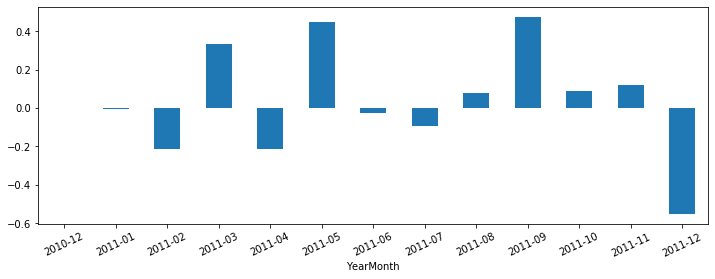

In [18]:
#let's plot it!
monthly_revenue['MonthlyGrowth'].plot(kind='bar', rot=25,figsize=[12,4])

In [19]:
#december looks like a rough fall, do we have a complete month on that?
df.tail().sort_values('InvoiceDate')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,YearMonth,DayOfWeek,Hour,Revenue
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,"12,680.00",France,2011,12,2011-12,4,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,"12,680.00",France,2011,12,2011-12,4,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,"12,680.00",France,2011,12,2011-12,4,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,"12,680.00",France,2011,12,2011-12,4,12,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,"12,680.00",France,2011,12,2011-12,4,12,14.85


## looks like we have incomplete data in December

In [22]:
#dropping december-2011 in our dataframe, 'cause it's incomplete
df = df[df['InvoiceDate'] < '2011-12-01']

In [24]:
#updating our monthly_revenue df
monthly_revenue = df[['YearMonth','Revenue']].groupby('YearMonth').sum()

monthly_revenue['MonthlyGrowth'] = monthly_revenue['Revenue'].pct_change()
monthly_revenue.reset_index()

,YearMonth,Revenue,MonthlyGrowth
0,2010-12,"572,713.89",nan
1,2011-01,"569,445.04",-0.01
2,2011-02,"447,137.35",-0.21
3,2011-03,"595,500.76",0.33
4,2011-04,"469,200.36",-0.21
5,2011-05,"678,594.56",0.45
6,2011-06,"661,213.69",-0.03
7,2011-07,"600,091.01",-0.09
8,2011-08,"645,343.90",0.08
9,2011-09,"952,838.38",0.48


Text(0.5, 1.0, 'Monthly growth')

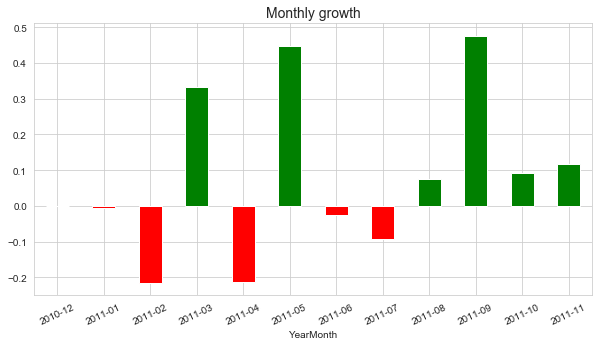

In [191]:
#let's check our growth again, with our cleaner df
monthly_revenue['MonthlyGrowth'].plot(kind='bar', rot=25,figsize=[10,5], color=monthly_revenue['MonthlyGrowth'].apply(lambda x: 'g' if x>0 else 'r')).set_title('Monthly growth', fontsize=14)

Text(0.5, 1.0, 'Total revenue by Day of the Week')

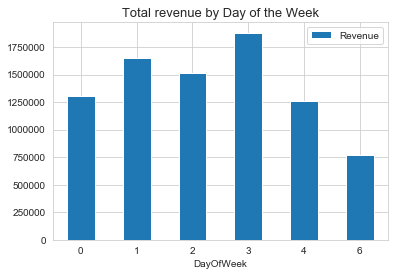

In [197]:
#do we have any behavior when we analyse revenue by day of the week?

revenue_day_week = df[['DayOfWeek','Revenue']].groupby('DayOfWeek').sum()
revenue_day_week.plot(kind='bar',rot=0).set_title('Total revenue by Day of the Week', fontsize=13)

Text(0.5, 1.0, 'Total revenue by Hour of the Day')

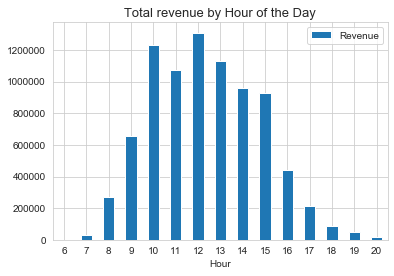

In [196]:
#do we have any behavior when we analyse revenue by hour of the day?
revenue_hour = df[['Hour','Revenue']].groupby('Hour').sum()
revenue_hour.plot(kind='bar',rot=0).set_title('Total revenue by Hour of the Day', fontsize=13)

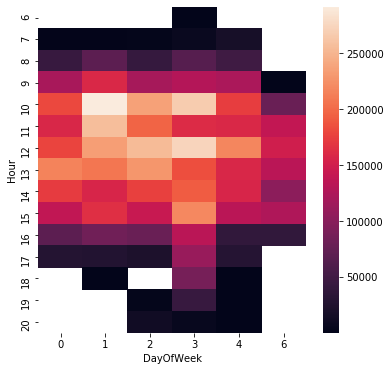

In [95]:
#plotting the agglomeration of sales per hour/day of the week

pivot = df.pivot_table(index='Hour', columns='DayOfWeek', values='Revenue', aggfunc='sum')

plt.figure(figsize=(6,6))
sns.heatmap(pivot)

## Biggest insights so far:
1.September '11, October '11 and November '11 were our top 3 months in terms of sales - looks like we created some good momentum. Kudos to September, where we grew 48% comparing to August;

2.We don't have any sales registered on Saturdays;

3.Our sales increase from monday to thursday, and then drop afterward, in terms of total revenue. Sunday is our worst day;

4.The closer to 12pm, the better - Probably our customers use their lunch break to access our ecommerce (between 11am and 2pm).

In [96]:
#now, let's see unique buyers by year
df_monthly_active = df.groupby('YearMonth')['CustomerID'].nunique().reset_index()
df_monthly_active['MonthlyGrowth'] = df_monthly_active['CustomerID'].pct_change()
df_monthly_active

,YearMonth,CustomerID,MonthlyGrowth
0,2010-12,885,nan
1,2011-01,741,-0.16
2,2011-02,758,0.02
3,2011-03,974,0.28
4,2011-04,856,-0.12
5,2011-05,1056,0.23
6,2011-06,991,-0.06
7,2011-07,949,-0.04
8,2011-08,935,-0.01
9,2011-09,1266,0.35


Text(0.5, 1.0, 'Customer base growth')

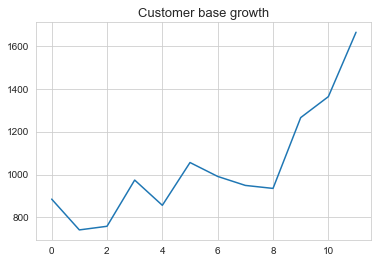

In [198]:
#plotting it we can see that we've grown our customer base
df_monthly_active['CustomerID'].plot().set_title('Customer base growth', fontsize=13)

In [116]:
#by merging monthly_revenue and df_monthly_active, we could see if our monthly revenue per customer (gonna call it 'rpc') has grown
rpc = pd.merge(monthly_revenue, df_monthly_active, on='YearMonth',how='inner')

del rpc['MonthlyGrowth_x'] #deleting column that we don't need
del rpc['MonthlyGrowth_y'] #deleting column that we don't need

rpc['RevenuePerCustomers'] = rpc['Revenue']/rpc['CustomerID']
rpc['RevenuePerCustomersGrowth'] = rpc['RevenuePerCustomers'].pct_change()
rpc

,YearMonth,Revenue,CustomerID,RevenuePerCustomers,RevenuePerCustomersGrowth
0,2010-12,"572,713.89",885,647.13,nan
1,2011-01,"569,445.04",741,768.48,0.19
2,2011-02,"447,137.35",758,589.89,-0.23
3,2011-03,"595,500.76",974,611.40,0.04
4,2011-04,"469,200.36",856,548.13,-0.10
5,2011-05,"678,594.56",1056,642.61,0.17
6,2011-06,"661,213.69",991,667.22,0.04
7,2011-07,"600,091.01",949,632.34,-0.05
8,2011-08,"645,343.90",935,690.21,0.09
9,2011-09,"952,838.38",1266,752.64,0.09


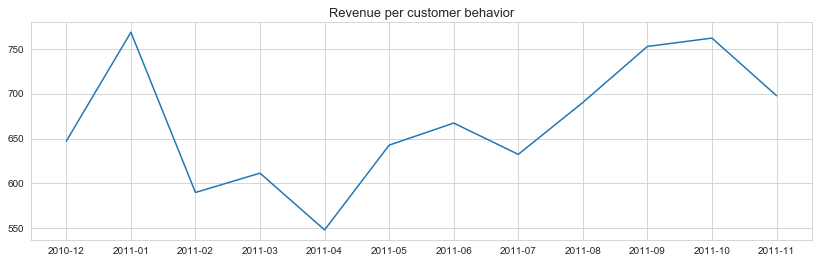

In [199]:
#plotting our result we can see that our revenue per customer has not been increasing as agressively as our customer base
plt.figure(figsize=(14,4))
rpc['RevenuePerCustomers'].plot().set_title('Revenue per customer behavior', fontsize=13)

plt.xticks(np.arange(len(rpc.index)), rpc['YearMonth']) #so our x axis has all of our indexes

plt.show()

In [120]:
#calculating our mean for future reference
rpc['RevenuePerCustomers'].mean()

667.483288988582

In [158]:
#who've been our biggest customers, and where do they come from?
revenue_by_customer_country = df[['CustomerID', 'Country', 'Revenue']].groupby(['CustomerID','Country']).sum().sort_values('Revenue', ascending=False)
revenue_by_customer_country.head(10)

,,Revenue
CustomerID,Country,
"14,646.00",Netherlands,"268,478.00"
"18,102.00",United Kingdom,"248,171.76"
"17,450.00",United Kingdom,"192,988.39"
"14,911.00",EIRE,"136,846.14"
"12,415.00",Australia,"124,914.53"
"14,156.00",EIRE,"117,379.63"
"17,511.00",United Kingdom,"83,683.06"
"16,029.00",United Kingdom,"81,024.84"
"12,346.00",United Kingdom,"77,183.60"


In [156]:
#creating a biggest customers df without their countries
revenue_by_customer = df[['CustomerID','Revenue']].groupby('CustomerID').sum().sort_values('Revenue', ascending=False)
revenue_by_customer.head(10)

,Revenue
CustomerID,
"14,646.00","268,478.00"
"18,102.00","248,171.76"
"17,450.00","192,988.39"
"14,911.00","136,846.14"
"12,415.00","124,914.53"
"14,156.00","117,379.63"
"17,511.00","83,683.06"
"16,029.00","81,024.84"
"12,346.00","77,183.60"


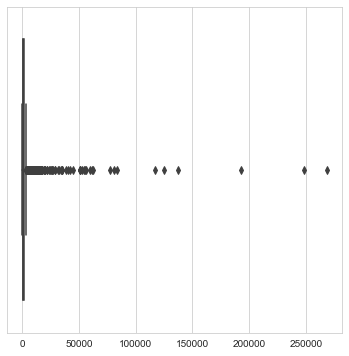

In [155]:
#plotting a boxplot will allow us to see our outliers
plt.figure(figsize=(6,6))
sns.boxplot(revenue_by_customer)

In [143]:
#let's remove those 9 outliers and create a new df (let's call it revenue by normal customers = 'revenue_bnc')
revenue_bnc = revenue_by_customer[~revenue_by_customer.index.isin(revenue_by_customer.head(9).index)]
revenue_bnc.head()

,Revenue
CustomerID,
"13,694.00","61,908.46"
"16,684.00","61,251.58"
"15,311.00","59,591.83"
"14,096.00","56,228.81"
"17,949.00","55,635.76"


Text(0.5, 1.0, 'Total revenue by client distribution')

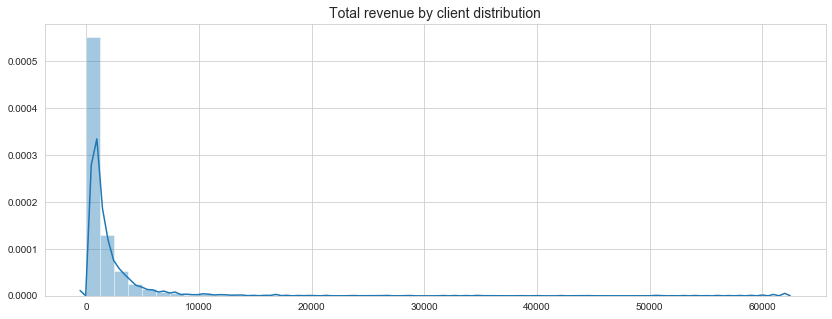

In [201]:
#now that we've removed outliers, let's see how are our customers spendings distributed?

x = revenue_bnc['Revenue'].values

sns.set_style("whitegrid")
plt.figure(figsize=(14,5))

sns.distplot(x).set_title('Total revenue by client distribution', fontsize=14)

In [32]:
#what about our best selling products?
df['Description'].value_counts().sort_values(ascending=False).head(15)

WHITE HANGING HEART T-LIGHT HOLDER    1976
REGENCY CAKESTAND 3 TIER              1676
JUMBO BAG RED RETROSPOT               1576
PARTY BUNTING                         1379
ASSORTED COLOUR BIRD ORNAMENT         1366
LUNCH BAG RED RETROSPOT               1281
SET OF 3 CAKE TINS PANTRY DESIGN      1130
LUNCH BAG  BLACK SKULL.               1066
POSTAGE                               1050
PACK OF 72 RETROSPOT CAKE CASES       1047
SPOTTY BUNTING                         992
LUNCH BAG SPACEBOY DESIGN              982
LUNCH BAG CARS BLUE                    973
HEART OF WICKER SMALL                  957
NATURAL SLATE HEART CHALKBOARD         948
Name: Description, dtype: int64

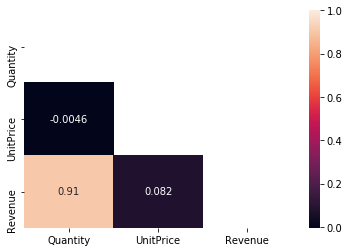

In [25]:
#what drives more our revenue? quantity or unit price?
corr = df[['Quantity','UnitPrice','Revenue']].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True, mask=mask)

## More insights:
1.Our customer base has been growing;

2.Our average ticket is $667, and our revenue/month per customer as been increasing, but not as agressive as our customer base;

3.We've had 6 customers that have spent more than 100k on our products! Biggest spender comes from the Netherlands, while the others com from the UK (2), EIRE (2) and Australia (1);

4.Our total revenue/customer distribution has a very long tail;

5.Our top selling products are: white hanging heart t-light holders, regency cakestands 3 tier, jumbo bag red retrospots, party buntings and assorted colour bird ornaments;

6.Quantity drives more the revenue of a sale, than the unit's price.

In [208]:
#let's explore more the data related to countries

#top 10 countries in terms of revenue? 

top_revenues_country = df[['Country','Revenue']].groupby('Country').sum().sort_values('Revenue', ascending=False).head(10).reset_index()
top_revenues_country

,Country,Revenue
0,United Kingdom,"6,836,007.38"
1,Netherlands,"273,718.32"
2,EIRE,"258,566.98"
3,Germany,"220,882.97"
4,France,"201,747.13"
5,Australia,"138,521.31"
6,Spain,"61,260.90"
7,Switzerland,"56,443.95"
8,Belgium,"39,778.61"
9,Sweden,"38,140.33"


In [202]:
#top 10 countries in terms of quantity sold to? - showing their share in our quantity of sales
df['Country'].value_counts(normalize=True).head(10)

United Kingdom   0.89
Germany          0.02
France           0.02
EIRE             0.02
Spain            0.01
Netherlands      0.01
Belgium          0.01
Switzerland      0.00
Portugal         0.00
Australia        0.00
Name: Country, dtype: float64

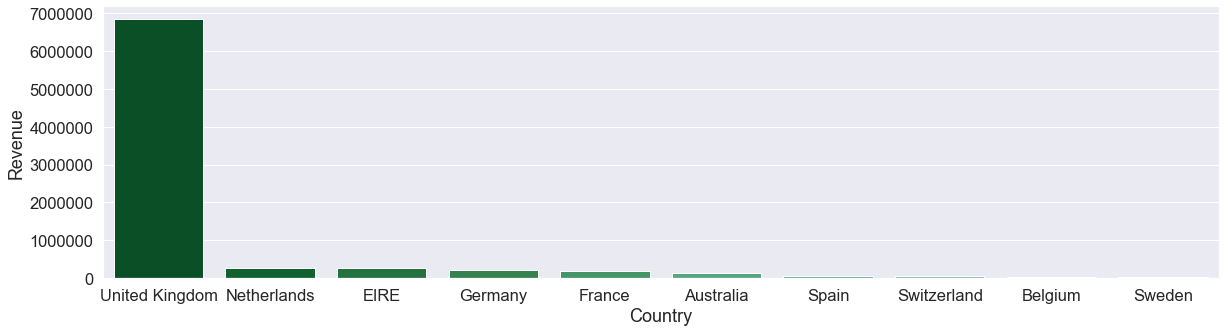

In [227]:
#plotting the top 10 revenues, by country

plt.figure(figsize=(20,5))
sns.set(font_scale = 1.5)

sns.barplot(data = top_revenues_country, x=top_revenues_country['Country'], y = top_revenues_country['Revenue'], palette=sns.color_palette("BuGn_r", n_colors = len(top_revenues_country) + 4))

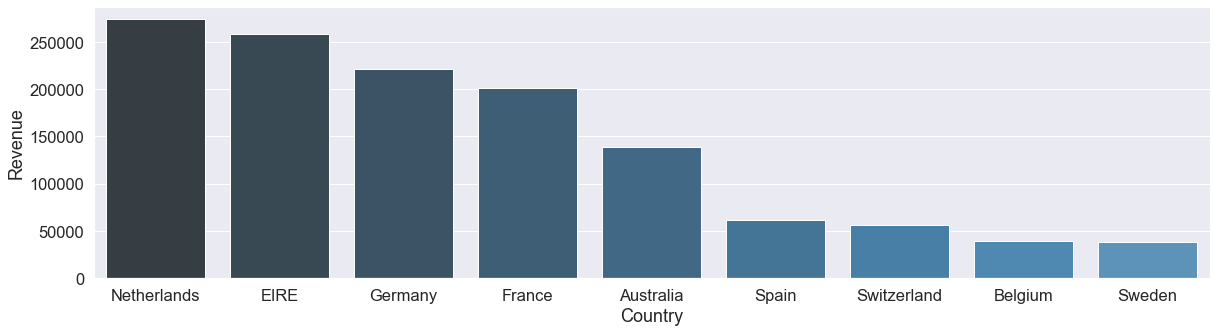

In [228]:
#plotting the top 10 revenues, by country, excluding the UK
top_revenues_country_no_uk = top_revenues_country[1:]

plt.figure(figsize=(20,5))
sns.set(font_scale = 1.5)
sns.barplot(data = top_revenues_country_no_uk, x=top_revenues_country_no_uk['Country'], y = top_revenues_country_no_uk['Revenue'], palette=sns.color_palette("Blues_d", n_colors = len(top_revenues_country) + 4))

In [164]:
#Netherlands revenue caught my eye, seems like our biggest spender is basically the source of their entire revenue

#creating a Netherlands df
df_n = df[df['Country'] == 'Netherlands']
df_n[['Revenue', 'CustomerID']].groupby('CustomerID').sum().sort_values('Revenue', ascending=False)

,Revenue
CustomerID,
"14,646.00","268,478.00"
"12,759.00","1,531.44"
"12,775.00","1,386.04"
"12,778.00",822.23
"12,787.00",463.66
"12,802.00",427.58
"12,790.00",324.92
"12,791.00",192.60
"12,789.00",91.85


In [169]:
print(268478/273718) #dividing customer id 14646 revenue by netherlands revenue

0.9808562096756516


## Last insights:
1.UK brings 90% of our revenue;

2.98% of Netherlands revenue (our 2nd best country in terms of revenue) comes from a single customer.

# For now, that's all. Thanks a lot!